In [1]:
import pandas as pd
import torch
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.metrics import r2_score
from gpytorch.mlls import ExactMarginalLogLikelihood
import gpytorch
import altair as alt
import matplotlib.pyplot as plt
import re
import os
import pickle
from scipy.stats import norm

In [14]:
import pickle, numpy as np
from scipy.spatial import distance

# Beispiel: zwei Dateien laden (gleiche Struktur, verschiedene Temperaturen)
with open("/Users/danielbock/MASTERTHESIS/MASTA/DataArchiv/Vext_allTEMP/Vext_300/Vext_MWW_300.pkl", "rb") as f:
    arr1 = np.asarray(pickle.load(f), dtype=np.float64).squeeze().flatten()

with open("/Users/danielbock/MASTERTHESIS/MASTA/DataArchiv/Vext_allTEMP/Vext_400/Vext_MWW_400.pkl", "rb") as f:
    arr2 = np.asarray(pickle.load(f), dtype=np.float64).squeeze().flatten()

# NaN/Inf entfernen (muss bei beiden gleich gemacht werden)
#mask = np.isfinite(arr1) & np.isfinite(arr2)
#arr1, arr2 = arr1[mask], arr2[mask]


# Temperatur-Skalierung (optional, falls du sie rausrechnen willst)
T1, T2 = 300, 400
arr1_raw = arr1 * T1
arr2_raw = arr2 * T2

print(arr1_raw)
print(arr2_raw)
# --- Verschiedene Distanzen berechnen ---
euclid = distance.euclidean(arr1_raw, arr2_raw)
cosine = distance.cosine(arr1_raw, arr2_raw)
corr   = distance.correlation(arr1_raw, arr2_raw)

print(f"Euklidische Distanz: {euclid:.5e}")
print(f"Kosinusdistanz:      {cosine:.5e}")
print(f"Korrelationsdistanz: {corr:.5e}")


[-752.73299217 -769.52433586 -800.67751408 ... -800.67751408 -769.52433586
 -752.73299217]
[-752.73294449 -769.52428818 -800.67749023 ... -800.67749023 -769.52428818
 -752.73294449]
Euklidische Distanz: 4.69889e+05
Kosinusdistanz:      1.62363e-03
Korrelationsdistanz: 2.21846e-03


Max. Unterschied: 1000.0
Mittlerer Unterschied: 843.2618937860766
Anzahl ungleicher Elemente: 250828


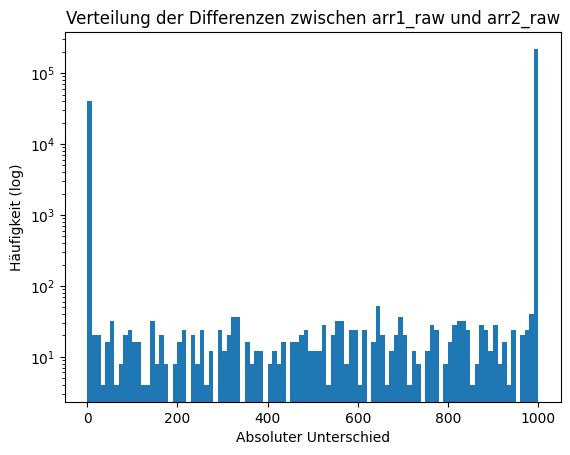

In [15]:
diff = np.abs(arr1_raw - arr2_raw)
print("Max. Unterschied:", diff.max())
print("Mittlerer Unterschied:", diff.mean())
print("Anzahl ungleicher Elemente:", np.sum(diff > 1e-10))

plt.hist(diff, bins=100, log=True)
plt.xlabel("Absoluter Unterschied")
plt.ylabel("Häufigkeit (log)")
plt.title("Verteilung der Differenzen zwischen arr1_raw und arr2_raw")
plt.show()

